In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


def np_summary(np_array):
    if np_array is None:
        print('\nNone')
    else:
        dim = np.ndim(np_array)
        print('\nndim: %s / shape: %s / size: %s' %(np.ndim(np_array), np.shape(np_array), np.size(np_array)))
        if dim > 1:
            t = 'np_array[:5' 
            for i in range(dim-1):
                if i == 0:
                    t += ',:20'
                else: t += ',:5'
            t += ']'
            print(eval(t))
        else:
            print(np_array[:20])

In [51]:
rng= np.random.RandomState(1)
rng.rand(2,2)

array([[  4.17022005e-01,   7.20324493e-01],
       [  1.14374817e-04,   3.02332573e-01]])

In [52]:
rng.randn(2,200).shape


# 2 by 2 dot  2 by 200 = 2 by 200  Transpose --> 200 by 2

(2, 200)

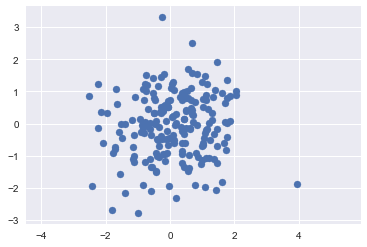


ndim: 2 / shape: (200, 2) / size: 400
[[ 0.36723181 -0.9520621 ]
 [ 1.23289919 -0.51814555]
 [-0.42285696 -1.4614036 ]
 [ 0.08646441 -0.51634791]
 [-2.14246673  0.3511169 ]]


2.0690646818887739

In [53]:
X = rng.randn(2,200).T

plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()
np_summary(X)
np.var(X[:,0])+ np.var(X[:,1])

In [54]:
rng= np.random.RandomState(1)

X = rng.rand(2,2)
X

array([[  4.17022005e-01,   7.20324493e-01],
       [  1.14374817e-04,   3.02332573e-01]])

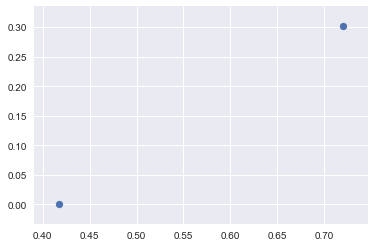

In [55]:
rng= np.random.RandomState(1)

X = rng.rand(2,2)
plt.scatter(X[0,:],X[1,:])

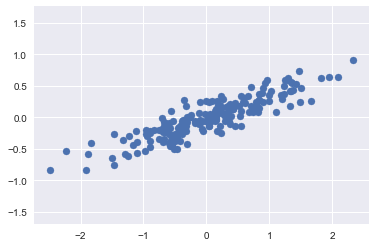


ndim: 2 / shape: (200, 2) / size: 400
[[-0.62530162 -0.17006366]
 [ 0.96069503  0.5909006 ]
 [-0.59854339 -0.40259339]
 [-2.22805938 -0.53257674]
 [-0.46143006 -0.49886724]]


0.77710434941419326

In [56]:
rng= np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()
np_summary(X)
np.var(X[:,0])+ np.var(X[:,1])

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [58]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [59]:
print(pca.explained_variance_)

[ 0.7625315  0.0184779]


In [60]:
np.power(0.9445,2) + np.power(0.3286,2)

1.0000582099999999

In [61]:
0.7625315 + 0.0184779

0.7810094000000001

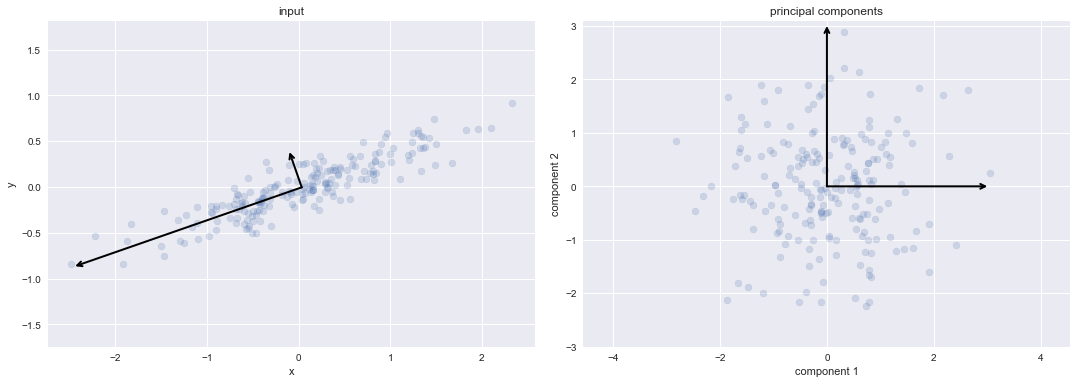

[(0.76253150088261124, array([-0.94446029, -0.32862557])), (0.018477895513562565, array([-0.32862557,  0.94446029]))]


In [62]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                     linewidth = 2,
                     shrinkA = 0,
                     shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))


plt.show()

print(list(zip(pca.explained_variance_, pca.components_)))

In [63]:
#pca.transform?
print(X[0])
print(np.mean(X, axis=0))
print(X[0]-np.mean(X, axis=0))
print(pca.components_[0])
print(X[0,0]-np.mean(X[:,0]))
print(X[0,1]-np.mean(X[:,1]))
print(np.sqrt(pca.explained_variance_))
print(np.dot(X[0]-np.mean(X,axis=0), pca.components_[0].T)/np.sqrt(pca.explained_variance_[0]))
np_summary(X_pca)

[-0.62530162 -0.17006366]
[ 0.03351168 -0.00408072]
[-0.6588133  -0.16598294]
[-0.94446029 -0.32862557]
-0.658813298008
-0.165982939521
[ 0.8732305   0.13593342]
0.775017864414

ndim: 2 / shape: (200, 2) / size: 400
[[ 0.77501786  0.43946956]
 [-1.22672528  1.89239746]
 [ 0.8335856  -1.24082757]
 [ 2.64493895  1.79548612]
 [ 0.72151892 -2.24121269]]


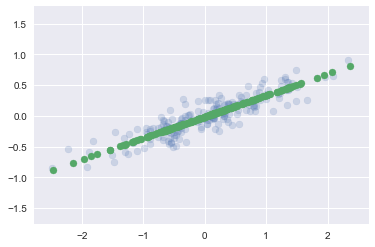

In [68]:
#PCA 응용 - 차원 축소
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=1)
plt.axis('equal')
plt.show()

In [69]:
#PCA 시각화
from sklearn.datasets import load_digits
digits = load_digits()
np_summary(digits.data)
digits.data.shape


ndim: 2 / shape: (1797, 64) / size: 115008
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.]
 [  0.   0.   7.  15.  13.   1.   0.   0.   0.   8.  13.   6.  15.   4.
    0.   0.   0.   2.   1.  13.]
 [  0.   0.   0.   1.  11.   0.   0.   0.   0.   0.   0.   7.   8.   0.
    0.   0.   0.   0.   1.  13.]]


(1797, 64)


ndim: 2 / shape: (1797, 2) / size: 3594
[[ -1.25946629  21.27488032]
 [  7.95760769 -20.76870073]
 [  6.99192466  -9.95598206]
 [-15.90610341   3.33245774]
 [ 23.30686465   4.26906695]]


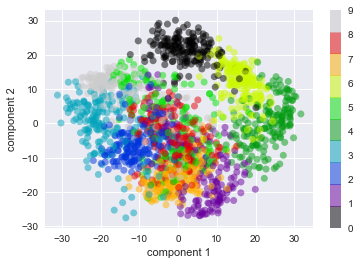

In [70]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
np_summary(projected)
plt.scatter(projected[:,0], projected[:,1],
           c = digits.target, edgecolor = 'none', alpha=0.5,
           cmap = plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [71]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabeldef plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)('number of components')
plt.xlabel('cumulative explained variance')

SyntaxError: invalid syntax (<ipython-input-71-e2a50c59ef44>, line 3)

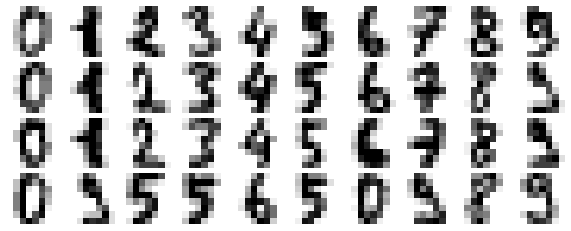

In [72]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)
plt.show()

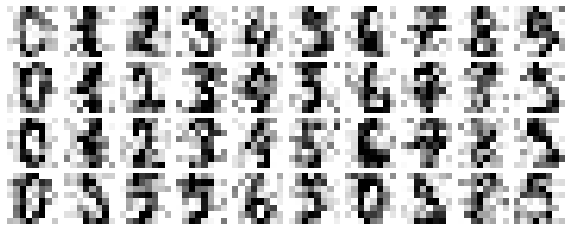

In [73]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [74]:
#분산의 50%만 보존
pca =PCA(0.5).fit(noisy)
pca.n_components_

12

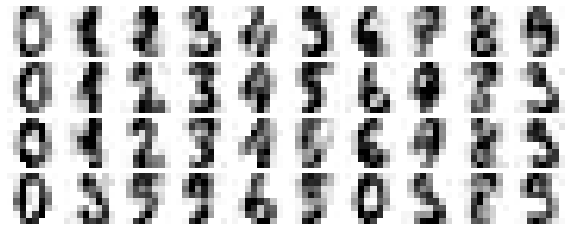

In [75]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
#단, 원데이터 필요